### Exercise 12.1

By keeping fixed all the other parameters, try to use at least two other optimizers, different from SGD. <span style="color:red">Watch to accuracy and loss for training and validation data and comment on the performances</span>.

In [99]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam
from tensorflow.keras.layers import Flatten, Conv2D, MaxPooling2D
from PIL import Image


seed=0
np.random.seed(seed) # fix random seed
tf.set_random_seed(seed)

from tensorflow.keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# cast floats to single precesion
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
print('... and with label', Y_train[20], 'after to_categorical')
print()
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)



def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

print('Model architecture created successfully!')


def compile_model():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=Adam(),
                  metrics=['accuracy'])
    return model

print('Model compiled successfully and ready to be trained.')


#training parameters
batch_size = 32
epochs = 5

# create the deep neural net
model_DNN = compile_model()

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))




X_train shape: (60000, 28, 28)
Y_train shape: (60000,)

60000 train samples
10000 test samples
... and with label [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] after to_categorical

X_train shape: (60000, 784)
Y_train shape: (60000, 10)
Model architecture created successfully!
Model compiled successfully and ready to be trained.
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 9s 154us/sample - loss: 0.2737 - acc: 0.9200 - val_loss: 0.1115 - val_acc: 0.9647
Epoch 2/5
60000/60000 [==============================] - 8s 138us/sample - loss: 0.1198 - acc: 0.9655 - val_loss: 0.0955 - val_acc: 0.9719
Epoch 3/5
60000/60000 [==============================] - 8s 139us/sample - loss: 0.0864 - acc: 0.9745 - val_loss: 0.0797 - val_acc: 0.9769
Epoch 4/5
60000/60000 [==============================] - 9s 150us/sample - loss: 0.0697 - acc: 0.9790 - val_loss: 0.0733 - val_acc: 0.9799
Epoch 5/5
60000/60000 [==============================] - 10s 161us/sample - l

10000/10000 [==============================] - 1s 62us/sample - loss: 0.0758 - acc: 0.9784

Test loss: 0.07584913796488109
Test accuracy: 0.9784


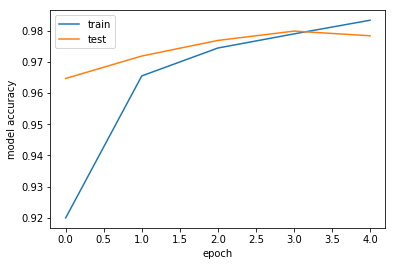

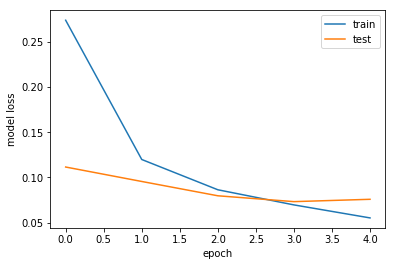

In [100]:
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best');plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best');plt.show()

#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)


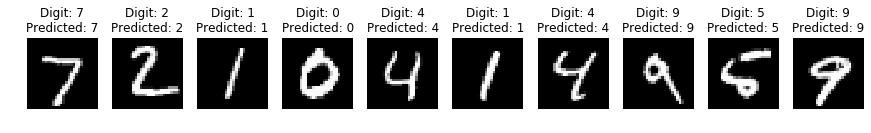

In [101]:
plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off');
    
plt.show()

Utilizzando diversi *optimizer*, ho notato che quello che abbassava di più il model loss e la cui accuratezza era maggiore era l'*Adam*.

### Exercise 12.2

Change the architecture of your DNN using convolutional layers. Use `Conv2D`, `MaxPooling2D`, `Dropout`, but also do not forget `Flatten`, a standard `Dense` layer and `soft-max` in the end. I have merged step 2 and 3 in the following definition of `create_CNN()` that **<span style="color:red">you should complete</span>**:

In [102]:
# you will need the following for Convolutional Neural Networks
from tensorflow.keras.layers import Flatten, Conv2D, MaxPooling2D

# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)

60000 train samples
10000 test samples


In [103]:
def create_CNN():
    # instantiate model
    model = Sequential()
    # add first convolutional layer with 10 filters (dimensionality of output space)
    model.add(Conv2D(10, kernel_size=(5, 5),
                     activation='relu',
                     input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(30, kernel_size=(5, 5),
                     activation='relu',
                     input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2,2)))   
    model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
    # add a dense all-to-all relu layer
    model.add(Dense(128, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    model.add(Dense(40, activation='relu'))
    # apply dropout with rate 0.5
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    #
    # ADD HERE SOME OTHER LAYERS AT YOUR WILL, FOR EXAMPLE SOME: Dropout, 2D pooling, 2D convolutional etc. ... 
    # remember to move towards a standard flat layer in the final part of your DNN,
    # and that we need a soft-max layer with num_classes=10 possible outputs
    #
    
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=Adam(),
                  metrics=['accuracy'])
    return model

La rete è costituira da un primo convolution layer, questo perchè ci aspettiamo che i pixels siano legati con quelli vicini e la convoluzione permette di preservare le relazioni tra le diverse parti dell'immagine riducendo però la complessità. A qui abbiamo aggiunto un pooling layer che permette di ridurre la dimensionalità e quindi il numero di parametri contro i problemi di overfitting. Si è ripetuta due volte tale operazione scegliendo come activation per i Convolution la funzione **Relu**. A questo punto si è utilizzato *Flatten* e creato un fully connected layer inserendo inoltre un funzione *Dropout* che inibisce alcuni neuroni in modo da aiutare il problema dell'overfitting. L'ultimo layer utilizza una funzione di attivazione di tipo soft-max che per ogni neurone esegue una sorta di normalizzazione producendo come una probabilità con valori compresi tra $0$ e $1$.


Con le operazioni inserite prima del Flatten, la matrice ha subito le seguenti modifiche: $28 \times 28\rightarrow 24 \times 24 \times 10 \rightarrow 12 \times 12 \times 10 \rightarrow 8 \times 8 \times 30 \rightarrow 4\times 4 \times 30  $


In [104]:
# training parameters
batch_size = 32
epochs = 5

# create the deep conv net
model_CNN=create_CNN()

# train CNN
history=model_CNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

# evaliate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 31s 510us/sample - loss: 0.2456 - acc: 0.9232 - val_loss: 0.0560 - val_acc: 0.9824
Epoch 2/5
60000/60000 [==============================] - 29s 477us/sample - loss: 0.0779 - acc: 0.9766 - val_loss: 0.0350 - val_acc: 0.9895
Epoch 3/5
60000/60000 [==============================] - 30s 500us/sample - loss: 0.0594 - acc: 0.9826 - val_loss: 0.0333 - val_acc: 0.9900
Epoch 4/5
60000/60000 [==============================] - 26s 435us/sample - loss: 0.0482 - acc: 0.9856 - val_loss: 0.0306 - val_acc: 0.9896
Epoch 5/5
10000/10000 [==============================] - 1s 143us/sample - loss: 0.0316 - acc: 0.9901

Test loss: 0.03164761905496343
Test accuracy: 0.9901


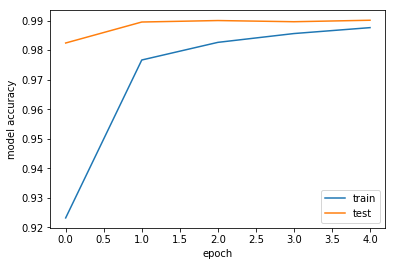

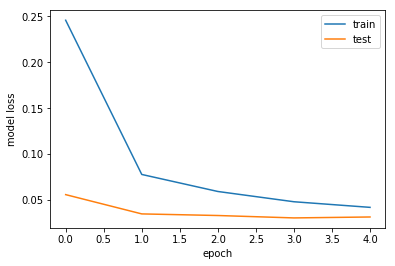

In [105]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best');plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best');plt.show()


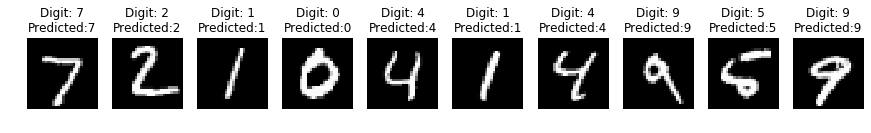

In [106]:
#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

predictions = model_CNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:{}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off');
    
plt.show()

### Exercise 12.3

Use the `gimp` application to create 10 pictures of your "handwritten" digits, import them in your jupyter-notebook and try to see if your CNN is able to recognize your handwritten digits.


<Figure size 1080x1080 with 0 Axes>

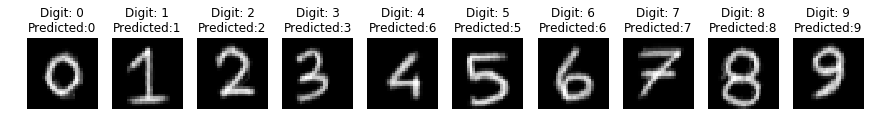

In [107]:
from PIL import Image
import os

data = np.zeros((10,28, 28))
plt.figure(figsize=(15, 15)) 

for k in range (10):
    digit_filename = "Digits/"+str(k)+".png"
    digit_in = Image.open(digit_filename).convert('L')
    ydim, xdim = digit_in.size
    pix=digit_in.load();
    for j in range(ydim):
        for i in range(xdim):
            data[k,i,j]=pix[j,i]
    
    data[k,:,:] /= 255

if keras.backend.image_data_format() == 'channels_first':
    data = data.reshape(data.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    data = data.reshape(data.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

pred_0 = model_CNN.predict(data)

data = data.reshape(data.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(data[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:{}".format(i, np.argmax(pred_0[i])))    
    plt.axis('off')
    
plt.show()
    



La rete neurale riesce a riconoscere i numeri da me scritti.